In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn.metrics import f1_score
from scipy.stats import multivariate_normal

In [2]:
def read_file(filename , delimiter = ','):
    raw_data = open(filename,'rt')
    reader = csv.reader(raw_data,delimiter = delimiter, quoting = csv.QUOTE_NONE)
    x = list(reader)
    return np.array(x).astype('float')

no. of data points in train set: 307
no. of features: 2
[[13.409 13.763]
 [14.196 15.853]
 [14.915 16.174]
 [13.577 14.043]]


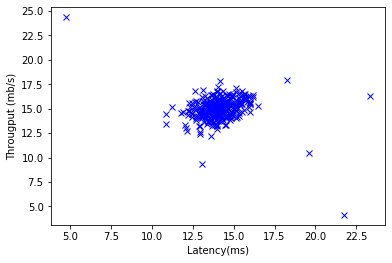

In [3]:
tr_data = read_file('tr_server_data.csv')
cv_data = read_file('cv_server_data.csv')
gt_data = read_file('gt_server_data.csv')
n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]
print("no. of data points in train set:", n_training_samples)
print("no. of features:", n_dim)

print(tr_data[1:5,:])
plt.xlabel('Latency(ms)')
plt.ylabel('Througput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.show()

In [15]:
def estimateGaussian(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.cov(dataset.T)
    return mu,sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean = mu, cov = sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0.01 #start with value slightly higher than 0 to avoid ill-defined f1-score warning.
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 100000
    epsilons = np.arange(min(probs),max(probs)/50,stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs<epsilon)
        #print(predictions)
        f = f1_score(gt,predictions,average = 'binary')
        #print(f)
        #print('----------')
        if(f>best_f1):
            best_f1 = f
            best_epsilon = epsilon
        plt.scatter(epsilon,f)
    plt.xlabel('Epsilon')
    plt.ylabel('F1-Score')
    plt.show()
    return best_f1,best_epsilon

Gather a little more data and create a test set (another group of values) with labeled data. Labeled data means that you know if they were anomalies or not for each example in the set. Find at least a few examples which are anomalies. Make the predictions using a value of epsilon value (start with a low value). Calculate the F1 score for that epsilon (the F1 score of an epsilon is a value that tells you how accurate your predictions are with that epsilon ). The bigger the F1 , the better. Increment epsilon by a small value, calculate F1 for the new epsilon. Do this a couple of times and keep the epsilon with the best F1 score. Let’s see the math and an example:

In [16]:
mu,sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

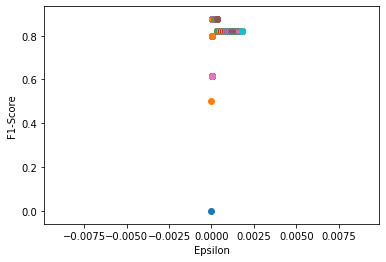

2.8915844249539893e-05


In [17]:
p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
print(ep)

In [18]:
outliers = np.asarray(np.where(p<ep))
outliers

array([[300, 301, 303, 304, 305, 306]], dtype=int64)

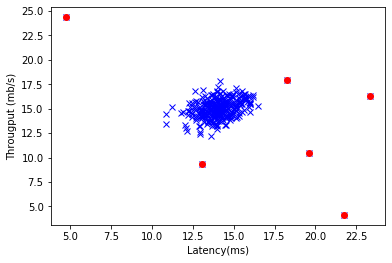

In [19]:
plt.figure()
plt.xlabel('Latency(ms)')
plt.ylabel('Througput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.plot(tr_data[outliers,0],tr_data[outliers,1],'ro')
plt.show()

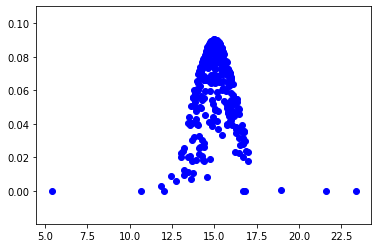

In [20]:

#plt.scatter(range(0,307),p_cv,color='r')
#plt.scatter(outliers,p_cv[outliers],color = 'g')

plt.scatter(cv_data[:,1],p_cv ,color = 'b')
plt.show()

In [21]:
p_cv

array([4.18169654e-02, 8.31789160e-02, 3.73037660e-02, 5.95252816e-02,
       7.35257917e-02, 4.65530672e-02, 5.92412887e-02, 8.49528731e-02,
       1.86002593e-02, 7.76503205e-02, 7.89929418e-02, 4.17364352e-02,
       5.64785909e-02, 1.13405415e-02, 5.74770457e-02, 4.00392748e-02,
       4.72405924e-02, 5.58558578e-02, 7.51998028e-02, 4.18329157e-02,
       8.76923923e-02, 3.05861196e-02, 8.49746753e-02, 7.14814751e-02,
       7.56243522e-02, 8.41515772e-02, 3.97801343e-02, 7.32984678e-02,
       3.91154008e-02, 6.83673355e-02, 8.42015240e-02, 6.36305268e-02,
       7.29075660e-02, 8.91863083e-02, 6.40971063e-02, 7.25035470e-02,
       6.42055318e-02, 2.01517011e-02, 5.45263741e-02, 8.75013575e-02,
       5.37601966e-02, 3.35705795e-02, 6.60170067e-02, 8.45326572e-02,
       8.94745485e-02, 7.64166486e-02, 3.57383843e-02, 8.49897453e-02,
       7.57571421e-02, 5.98784447e-02, 4.50951057e-02, 8.96604107e-02,
       7.66791126e-02, 7.62224509e-02, 4.58629132e-02, 7.27542027e-02,
      